In [1]:
! pip install progressbar2

In [26]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
from datetime import datetime, timedelta
import re
from progressbar import progressbar
import matplotlib.pyplot as plt



#### 한글 설치

In [27]:
! mkdir ~/fonts && cd ~/fonts && wget http://ponce.cc/slackware/sources/repo/NanumFont_TTF_ALL.zip && unzip NanumFont_TTF_ALL.zip && pwd

mkdir: cannot create directory ‘/home/nbuser/fonts’: File exists


#### 한글 설정

In [28]:
import platform
#from matplotlib import font_manager, rc
from matplotlib import font_manager as fm

# 폰트 변경시 마이너스 깨지는 문제 수정
plt.rcParams['axes.unicode_minus'] = False 

font_size = 12   # font size 입력
#win_path = "c:/Windows/Fonts/malgun.ttf"

# 시스템에 저장되어있는 고딕폰트 목록 가져오기
#gothic_fonts = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]
#print(gothic_fonts)

# plt전역에 폰트 지정
if platform.system()=='Darwin':
    plt.rcParams['font.family'] = "AppleGothic"
elif platform.system() == 'Windows' :
    plt.rcParams['font.family'] = "NanumBarunGothic"
elif platform.system() == 'Linux':
    font_dirs = ['/home/nbuser/fonts', ]
    # System font 찾는 경로를 설정
    font_files = fm.findSystemFonts(fontpaths=font_dirs)
    # 폰트 파일로 부터 폰트 리스트를 생성
    font_list = fm.createFontList(font_files)
    print(font_list)
    # matplotlib fontManager의 ttflist에 생성한 폰트리스트를 추가
    fm.fontManager.ttflist.extend(font_list)
    plt.rcParams['font.family'] = "NanumGothic"
else :

    print('Unknown')

plt.rcParams["font.size"] = font_size

[<Font 'NanumMyeongjo' (NanumMyeongjoBold.ttf) normal normal bold normal>, <Font 'NanumMyeongjo' (NanumMyeongjoExtraBold.ttf) normal normal bold normal>, <Font 'NanumMyeongjo' (NanumMyeongjo.ttf) normal normal 400 normal>, <Font 'Nanum Pen Script' (NanumPen.ttf) normal normal 400 normal>, <Font 'NanumGothic' (NanumGothic.ttf) normal normal 400 normal>, <Font 'NanumGothic' (NanumGothicBold.ttf) normal normal bold normal>, <Font 'Nanum Brush Script' (NanumBrush.ttf) normal normal 400 normal>, <Font 'NanumGothic' (NanumGothicExtraBold.ttf) normal normal bold normal>]


In [29]:
work = pd.read_excel("액면분할.xlsx", encoding = 'euckr', index_col = '코드')

In [30]:
work[['발표일', '주주총회일', '거래정지일', '거래재개일']] = work[['발표일', '주주총회일', '거래정지일', '거래재개일']].apply(pd.to_datetime)

In [31]:
work.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, A003800 to A014530
Data columns (total 7 columns):
회사명       94 non-null object
액면가(전)    94 non-null int64
액면가(후)    94 non-null int64
발표일       94 non-null datetime64[ns]
주주총회일     94 non-null datetime64[ns]
거래정지일     94 non-null datetime64[ns]
거래재개일     94 non-null datetime64[ns]
dtypes: datetime64[ns](4), int64(2), object(1)
memory usage: 5.9+ KB


In [32]:
work

,회사명,액면가(전),액면가(후),발표일,주주총회일,거래정지일,거래재개일
코드,,,,,,,
A003800,에이스침대,5000,1000,2018-08-01,2018-09-14,2018-10-18,2018-10-22
A035420,NAVER,500,100,2018-07-25,2018-09-07,2018-10-10,2018-10-12
A065940,바이오빌,500,100,2018-05-30,2018-08-07,2018-09-10,2018-09-12
A083640,인콘,500,100,2018-07-16,2018-07-31,2018-09-03,2018-09-21
A033430,디에스티,500,100,2018-03-12,2018-03-27,2018-06-28,2018-07-16
A102210,해덕파워웨이,500,100,2018-07-02,2018-07-16,2018-08-21,2018-09-04
A003410,쌍용양회공업,5000,1000,2018-04-25,2018-06-07,2018-07-09,2018-07-11
A118990,모트렉스,500,100,2018-06-07,2018-07-18,2018-08-20,2018-08-31
A215200,메가스터디교육,500,100,2018-05-28,2018-07-13,2018-08-17,2018-08-30


In [50]:
work.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, A003800 to A014530
Data columns (total 7 columns):
회사명       94 non-null object
액면가(전)    94 non-null int64
액면가(후)    94 non-null int64
발표일       94 non-null datetime64[ns]
주주총회일     94 non-null datetime64[ns]
거래정지일     94 non-null datetime64[ns]
거래재개일     94 non-null datetime64[ns]
dtypes: datetime64[ns](4), int64(2), object(1)
memory usage: 8.4+ KB


In [53]:
len(work.index.unique())

93

In [54]:
len(work)

94

In [55]:
work.reset_index()['코드'].describe()

count          94
unique         93
top       A004990
freq            2
Name: 코드, dtype: object

In [36]:
work

,회사명,액면가(전),액면가(후),발표일,주주총회일,거래정지일,거래재개일
코드,,,,,,,
A003800,에이스침대,5000,1000,2018-08-01,2018-09-14,2018-10-18,2018-10-22
A035420,NAVER,500,100,2018-07-25,2018-09-07,2018-10-10,2018-10-12
A065940,바이오빌,500,100,2018-05-30,2018-08-07,2018-09-10,2018-09-12
A083640,인콘,500,100,2018-07-16,2018-07-31,2018-09-03,2018-09-21
A033430,디에스티,500,100,2018-03-12,2018-03-27,2018-06-28,2018-07-16
A102210,해덕파워웨이,500,100,2018-07-02,2018-07-16,2018-08-21,2018-09-04
A003410,쌍용양회공업,5000,1000,2018-04-25,2018-06-07,2018-07-09,2018-07-11
A118990,모트렉스,500,100,2018-06-07,2018-07-18,2018-08-20,2018-08-31
A215200,메가스터디교육,500,100,2018-05-28,2018-07-13,2018-08-17,2018-08-30


### 해당 종목 주가 데이블 생성하기

#### csv에서 불러오기

In [56]:
price_table = pd.read_excel("액면분할종목_가격표.xlsx", encoding = 'euckr', index_col = '일자')

In [57]:
price_table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50914 entries, 2018-05-24 to 2015-12-11
Data columns (total 5 columns):
code    50914 non-null object
시가      50914 non-null int64
고가      50914 non-null int64
저가      50914 non-null int64
종가      50914 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.3+ MB


In [58]:
price_table

,code,시가,고가,저가,종가
일자,,,,,
2018-05-24,A234100,19350,19350,19350,19350
2018-05-23,A234100,22250,22250,18700,19350
2018-05-21,A234100,21800,23200,21500,21700
2018-05-18,A234100,20200,22300,18600,21850
2018-05-17,A234100,24700,24700,20200,20450
2018-05-16,A234100,23650,24350,22250,22800
2018-05-15,A234100,25000,25300,22350,23950
2018-05-14,A234100,26000,26000,24350,25000
2018-05-11,A234100,24600,24900,23500,24550


In [59]:
price_table = price_table[::-1]
price_table

,code,시가,고가,저가,종가
일자,,,,,
2015-12-11,A014530,3075,3230,3075,3190
2015-12-14,A014530,3185,3195,3090,3115
2015-12-15,A014530,3065,3185,3065,3130
2015-12-16,A014530,3165,3165,3090,3145
2015-12-17,A014530,3200,3200,3105,3200
2015-12-18,A014530,3240,3240,3155,3225
2015-12-21,A014530,3230,3230,3120,3190
2015-12-22,A014530,3225,3225,3100,3195
2015-12-23,A014530,3160,3215,3145,3165


---

## 단일 케이스 시각화 

- A004410	서울식품공업	2017-07-28	 

### 추출 데이터 

    
* 회사명(company)


* 주가데이터(발표일이전 20일 전부터 발표일 이후 20일 데이터)


* 발표일 - 주총일 - 거래정지일 - 거래재개일 이후 주가 흐름 분석


In [60]:
company = work.loc['A004410', '회사명']
company

'서울식품공업'

#### 주가데이터 추출하기

In [62]:
# 발표일 추출

announce_date = work.loc['A004410', '발표일']
announce_date = announce_date - timedelta(days = 20)
announce_date

Timestamp('2017-07-08 00:00:00')

In [64]:
# 거래재개일 추출

open_date = work.loc['A004410', '거래재개일']
open_date = open_date + timedelta(days = 20)
open_date

Timestamp('2017-11-14 00:00:00')

In [66]:
price = price_table[price_table['code'] == 'A004410'].loc[announce_date : open_date, '종가']

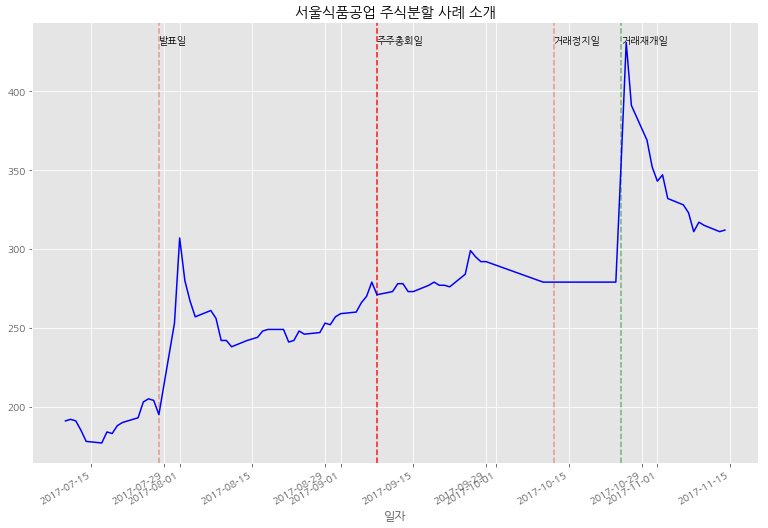

In [69]:
plt.style.use('ggplot')

plt.figure(figsize=(13,9))
plt.axvline(work.loc['A004410', '거래재개일'], linestyle= '--', alpha = 0.5, color='green')
plt.axvline(work.loc['A004410', '발표일'], linestyle= '--', alpha = 0.5)
plt.axvline(work.loc['A004410', '거래정지일'], linestyle= '--', alpha = 0.5)
plt.axvline(work.loc['A004410', '주주총회일'], linestyle= '--', alpha = 0.9, color='red')

plt.text(work.loc['A004410', '발표일'], price.max() , '발표일')
plt.text(work.loc['A004410', '거래정지일'], price.max() , '거래정지일')
plt.text(work.loc['A004410', '주주총회일'], price.max() , '주주총회일')
plt.text(work.loc['A004410', '거래재개일'], price.max() , '거래재개일')





plt.title("{0} 주식분할 사례 소개".format(work.loc['A004410', '회사명']))

price.plot(color='blue')

plt.show()

### 특정 종목의 사례를 보여주는 함수(코드 입력 시 시각화가 가능한 함수)\

In [46]:
def make_chart(code) :
    date_from = announce_date = work.loc[code, '발표일'] - timedelta(days = 20)
    date_to = work.loc[code, '거래재개일'] + timedelta(days = 20)
    
    
    price = price_table[price_table['code'] == code].loc[date_from : date_to, '종가']
    
    
    plt.figure(figsize=(13,9))
    plt.axvline(work.loc[code, '거래재개일'], linestyle= '--', alpha = 0.5)
    plt.axvline(work.loc[code, '발표일'], linestyle= '--', alpha = 0.5)
    plt.axvline(work.loc[code, '거래정지일'], linestyle= '--', alpha = 0.5)
    plt.axvline(work.loc[code, '주주총회일'], linestyle= '--', alpha = 0.5)

    plt.text(work.loc[code, '발표일'], price.max() , '발표일')
    plt.text(work.loc[code, '거래정지일'], price.max() , '거래정지일')
    plt.text(work.loc[code, '주주총회일'], price.max() , '주주총회일')
    plt.text(work.loc[code, '거래재개일'], price.max() , '거래재개일')



    price.plot()

    plt.show()


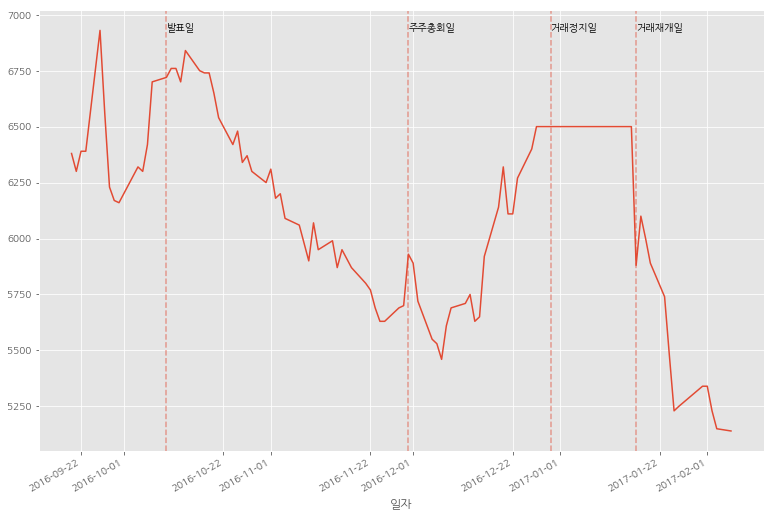

In [70]:
make_chart('A095570')

### 다양한 케이스 시각화